In [1]:
import iconclass
import os
import pandas as pd
import json
from tqdm import tqdm 
import numpy as np
dataset_path = os.environ["ICONCLASS"]

In [2]:
iconclass.get('')

- 'n' The notation of this node (the same thing as the first parameter of the .get() call)
- 'p' Path to this node, starting from the root of the hierarchy
- 'c' Children (descendants) of this node
- 'kw' Keywords, a dict keyed on two-letter language code containing keywords associated with this entry
- 'txt Textual descriptions of this notation, a dict of strings keyed on two-letter language code.

In [3]:
with open(os.path.join(dataset_path, "data.json")) as f:
    data = json.load(f)
    
lang_counter = list()
kw_counter = list()

In [4]:
lang = "fr"
for idx, (im_path, attributes) in tqdm(enumerate(data.items())):
    iconclass_attributes = iconclass.get_list(attributes)
    for attribute in iconclass_attributes:
        if attribute is None or "kw" not in attribute.keys():
            break
        if lang not in attribute["kw"].keys():
            break
            
        for kw in attribute["kw"][lang]:
            kw_counter.append(kw)
                

87744it [01:48, 810.21it/s]


In [5]:
most_view_theme = pd.Series(kw_counter).value_counts()

In [8]:
most_view_theme[:60]

adulte                          5957
paysage                         5316
Ripa                            5256
droit (contraire de gauche)     5114
gauche (contraire de droite)    5096
initiale historiée              5072
homme                           4425
imprimé                         4262
femme                           4131
asseoir                         3978
arbre                           3888
debout                          3415
jambe                           3299
initiale                        3191
tête                            2331
chien                           2153
paysage idéal                   2143
ville                           2091
livre                           2084
maison                          2063
rivière                         1860
soldat                          1835
animal                          1792
cité idéale                     1733
veduta                          1733
vase                            1677
position                        1643
f

In [10]:
relevant_attributes = ['landscape', 'mythology','historiated initial', 
                       'portrait historié', 'printed matter',  'emblem', 
                       'veduta frontale', 'initial', 'ideal landscape', 
                       'human figure', 'left (opposite to right)', 'right (opposite to left)', 
                      'pictorial chart', 'classical antiquity']

relevant_attributes = ['couvre-chef', 'initiale', 'libellule', 'croix' ]
lang = 'fr'

relevant_images = {relevant_attribute: list() for relevant_attribute in relevant_attributes}

for idx, (im_path, attributes) in tqdm(enumerate(data.items())):
    iconclass_attributes = iconclass.get_list(attributes)
    for attribute in iconclass_attributes:
        if attribute is None or "kw" not in attribute.keys():
            break
        if lang not in attribute["kw"].keys():
            break
        for relevant_attribute in relevant_attributes:
            if relevant_attribute in attribute["kw"][lang]:
                relevant_images[relevant_attribute].append(im_path)

87744it [01:48, 807.90it/s]


In [11]:
len(relevant_attributes)

4

In [12]:
attributes_to_im = pd.DataFrame.from_dict(relevant_images, orient='index')
#attributes_to_im.to_csv('data/images_attributes.csv')
#attributes_to_im = pd.read_csv('data/images_attributes_2.csv', index_col=0).transpose()

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
def show_images(attributes_to_im, n_images=5):
    
    full_col_len = len(attributes_to_im.isna().sum().loc[(attributes_to_im.isna().sum() == 0)]) - 1
    
    photo_to_print = attributes_to_im.loc[:, np.random.randint(full_col_len, size=n_images)]
    photo_to_print = photo_to_print.transpose().to_dict(orient='list')
    n_attributes = len(photo_to_print.keys())
    fig, axes = plt.subplots(figsize=(20, n_attributes * 5) , nrows=n_attributes, 
                                 ncols=n_images)
    
    for i, (attribute, paths) in enumerate(photo_to_print.items()):
        
        for j, path in enumerate(paths):
            image = Image.open(os.path.join(os.environ['ICONCLASS'], path))
            axes[i][j].imshow(image)
            axes[i][j].set_title(f"{attribute} ({path})")
            axes[i][j].xaxis.set_visible(False)
            axes[i][j].yaxis.set_visible(False)
    


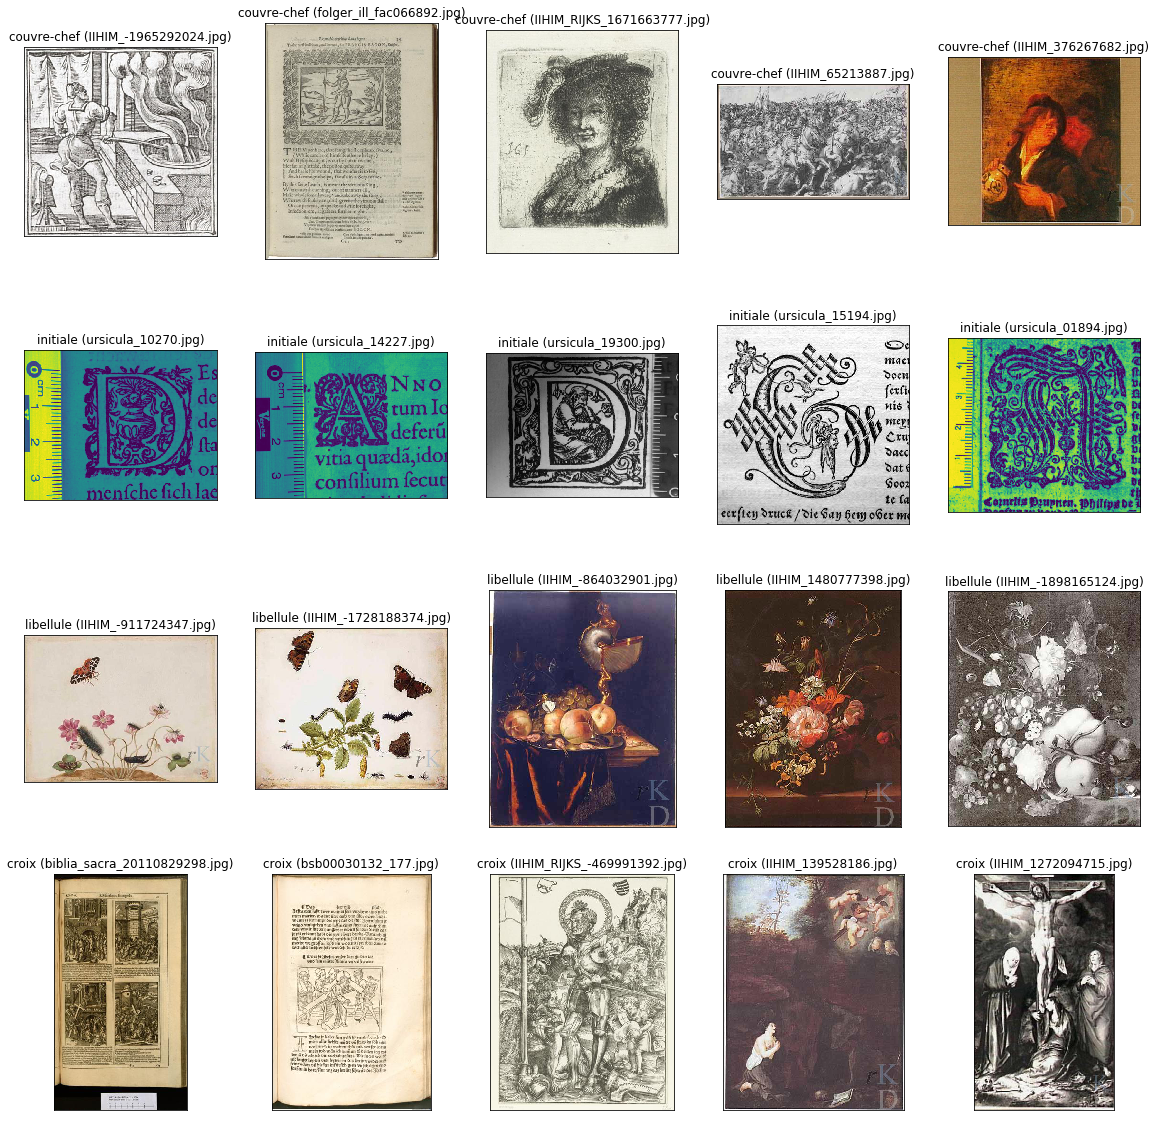

In [15]:
show_images(attributes_to_im, n_images=5)

In [127]:
attributes_to_im.to_csv('data/images_attributes_2.csv')